In [1]:
import pandas as pd
df = pd.read_csv("filtered_text_time.csv")

In [2]:
import re
def contains_keywords(text):
    # Define the regular expression pattern to match 'walk' and 'out' together in any order,
    # or 'leave', or 'left'
    pattern = re.compile(
        r'(\bwalk\b.*?\bout\b|\bleave\b|\bleft\b)',
        re.IGNORECASE
    )

    # Search the text for the pattern
    return bool(pattern.search(text))

In [3]:
df['leave'] = df['text'].apply(
    lambda x: contains_keywords(x) 
).tolist()

In [4]:
df_leave = df[df['leave'] == True]

In [8]:
df_leave 

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,manual_hour,first_matching_sentence,contains_number,closest_number_minutes,closest_number_hours,total_time,leave
4,36,q22lpVDGRGiglEUqjdbA4A,8BWSevPgwWzMwqu_K-AdfA,P10BsKUeoeCeVoK4BS2u0w,2.0,5,0,0,I've been wanting to try Trust Me BBQ for over...,2012-05-28 17:55:04,0.0,I stopped in there about 3 months ago and wait...,True,10,0,0.166667,True
10,71,OYrtEEEu0qLiTdwlPm9egQ,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,0,1,"I love trying fresh seafood on piers, wharfs a...",2015-08-19 04:11:47,0.0,We waited about 25 minutes and got a table out...,True,25,0,0.416667,True
13,108,Bhn9WcAe2rO26HT-TLKK_Q,D546DQFUUZk-DGsBJeqAbg,dJfkfBbJz7wi0RgW-ph_Eg,1.0,0,0,0,Awefull!!!! \nIf I could give zero or negative...,2017-10-02 22:59:04,0.0,Waiter comes back 20 minutes later (no water),True,20,0,0.333333,True
14,113,hoFBjn6qNY1V4_ZT9gJB3g,AXBsPgSbyjGkAqPLSwiTYg,P50W1jWWLTFjuEUdkGZJdA,1.0,2,0,0,Wish I had read the reviews before we stopped ...,2014-11-30 02:13:27,0.0,"They promptly took our food order, but we wait...",True,50,0,0.833333,True
17,154,TP0HYy4GqYtrWMlFIhxw3A,YRsNXrlyvjnr7NLSDwen0Q,LHSTtnW3YHCeUkRDGyJOyw,1.0,4,2,0,We arrived a few minutes early for a 7pm reser...,2016-05-31 01:58:22,0.0,"Meanwhile, another large party arrived without...",True,40,0,0.666667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183955,1255511,5W8WkJUVo1pgigMYNfzIFA,XT8U_rCZ4c15BoFkDjkOIA,dgEvzJHBA35xZG2DYfFdaQ,1.0,6,1,0,As soon as we approached the hostess station o...,2019-10-21 13:45:43,0.0,The waitlist said under 5 minutes and we were ...,True,5,0,0.083333,True
183956,1255526,q9aMusl-BFzt2gXUPjMjVw,hNyc6qXw2_M2OE1l0Ne3NA,oXMk5prvnXniaSFbR8vHqw,1.0,0,0,0,Used to go here every week. Won't go again. Ma...,2020-06-03 00:49:05,2.0,This was after the first visit putting in my o...,True,0,2,4.000000,True
183962,1255583,tyGewEnrXZvE1q7xAri7kg,Lt7xSv-7QIhKrctrXEwvxA,uP42QDUxC2lxz15BUDbFnA,1.0,0,0,0,Horrible from the time I made the reservation....,2021-10-23 10:25:21,1.0,Sat for an hour finally 6 of the 7 dinners cam...,True,0,0,1.000000,True
183963,1255585,JhSG_QMaykb8T672rZEWgw,yf1H6T1fb06lq2bNYLZaPg,0uL-FXY1M2UC12eZcFlTuQ,3.0,1,0,0,"If you're going here for drinks, you'll enjoy ...",2021-02-28 22:31:20,0.0,"After we sat down, we ended up waiting about 1...",True,10,0,0.166667,True


In [11]:
percentiles = df_leave["total_time"].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9])

In [12]:
percentiles

0.05    0.000000
0.10    0.083333
0.25    0.166667
0.50    0.333333
0.75    0.666667
0.90    1.750000
Name: total_time, dtype: float64

5 min 90% 1 start
10 min 75% 1 star

In [14]:
0.166 * 60

9.96

In [ ]:
df_bad = df_leave[df_leave[""]]

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_72402/394947568.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_leave = df_leave[df["total_time"] < 4]


array([[<Axes: title={'center': 'total_time'}>]], dtype=object)

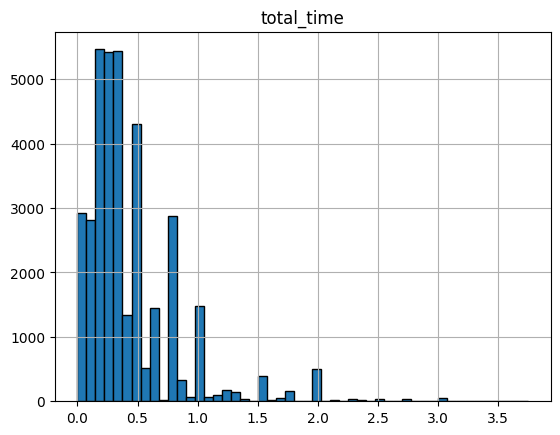

In [19]:

df_leave = df_leave[df["total_time"] < 4]
df_leave.hist("total_time", bins = 50, edgecolor='black')

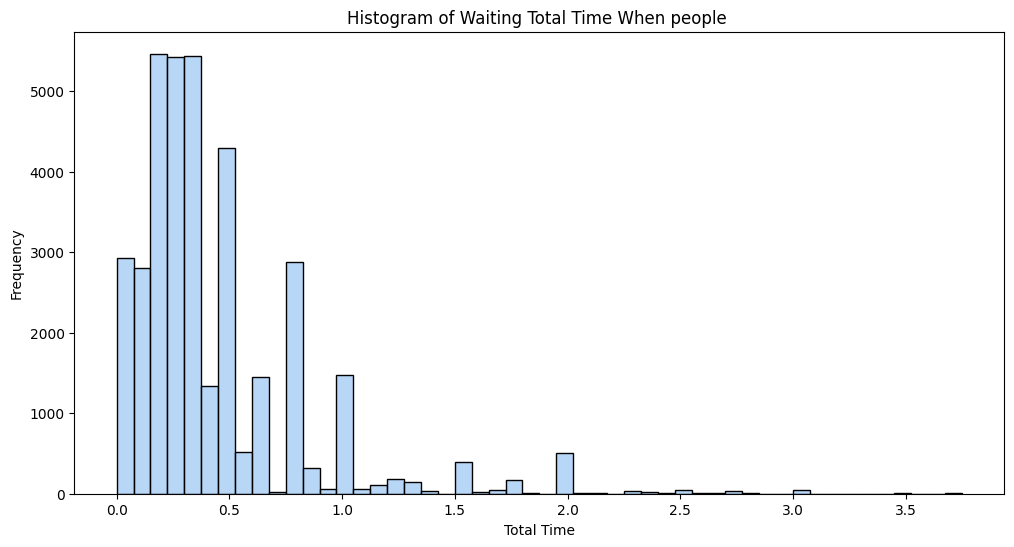

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt 


plt.figure(figsize=(12, 6))

sns.set_palette('pastel')

# Plot the histogram with Seaborn for prettier colors
sns.histplot(df_leave['total_time'], bins= 50 , kde=False)
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Total Time When people ')
plt.show()